In [1]:
import os
import pandas as pd
import scipy
from scipy import stats
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

creating figure 2b

In [2]:
path = os.getcwd()
path += '\\files\\for_paper\\maps 1 5 10'

# to get a different map change between D_1.0, D_5.0 and D_10.0 in the file name
df = pd.read_csv(path+'\\billiard_cx_0_cy_0_len_2.25_diam_0.9_D_1.0_N_500_map_diff_first_fit.csv.zip', index_col = 0)
df = df.to_numpy()
shape = np.shape(df)
df = df.ravel()
df = np.where(df == 0, np.nan, df)
df = np.reshape(df, shape)
df = pd.DataFrame(df)

array = df.to_numpy()
array = array.ravel()
indices = np.where(np.isnan(array) == False)[0]
array = array[indices]
average = np.mean(array)

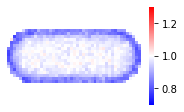

In [3]:
figsize_halfwidth = (3, 1.8)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig2b = plt.figure(figsize = figsize_halfwidth)
axs2b = fig2b.subplots(1)
axs2b.set_yticks([-1,-0.5,0.0,0.5,1])
axs2b.set_yticklabels([-1,-0.5,0.0,0.5,1])
axs2b.set_ylabel(r'$\mu m$')#'D_center [um^2/s] CPD_corr')


axs2b.set_xlabel(r'$\mu m$')
axs2b.set_xticks([-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2])
axs2b.set_xticklabels([-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2])

map0 = sns.heatmap(df, cmap = 'bwr', vmin = 0.7, vmax = 1.3, xticklabels = False, yticklabels = False, square = True)

fig2b.savefig('fig2b_1.pdf', dpi = 300, format = 'pdf', bbox_inches='tight')

figure 2c

In [4]:
path = os.getcwd()
path += '\\files\\for_paper\\maps apparent vs sim'

square_center = []
center_region = []

D_0_01 = []
D_0_05 = []
D_0_1 = []
D_0_5 = []
D_1 = []
D_2_5 = []
D_5 = []
D_8 = []
D_10 = []
D_15 = []
D_20 = []
D_25 = []
D_30 = []
D_35 = []
D_50 = []
D_80 = []
D_110 = []


names = [0.01, 0.05, 0.1, 0.5, 1.0, 2.5, 5.0, 8.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 50.0, 80.0, 110.0]
names = np.array(names)

for file in os.listdir(path):
    
    if file.endswith("diff_first_fit.csv.zip"):
        name = path + '\\' + file
        
        while file[0] != 'b':
            
            file = file[1:]
        
        df = pd.read_csv(name, index_col = 0)
        square = (df.iloc[8,21] + df.iloc[8,22] + df.iloc[8,23] + df.iloc[9,21] + df.iloc[9,22] + df.iloc[9,23])/6
        region = df.iloc[:,9:35]
        region = region.to_numpy()
        region = np.sum(region)/(18*27)
        
        if file[39:43] == '0.01':
            D_0_01.append(square)
            D_0_01.append(region)
            
        elif file[39:43] == '0.05':
            D_0_05.append(square)
            D_0_05.append(region)
            
        elif file[39:42] == '0.1':
            D_0_1.append(square)
            D_0_1.append(region)
            
        elif file[39:42] == '0.5':
            D_0_5.append(square)
            D_0_5.append(region)
            
        elif file[39:42] == '1.0':
            D_1.append(square)
            D_1.append(region)
            
        elif file[39:42] == '2.5':
            D_2_5.append(square)
            D_2_5.append(region)
            
        elif file[39:42] == '5.0':
            D_5.append(square)
            D_5.append(region)
            
        elif file[39:42] == '8.0':
            D_8.append(square)
            D_8.append(region)
            
        elif file[39:43] == '10.0':
            D_10.append(square)
            D_10.append(region)
            
        elif file[39:43] == '15.0':
            D_15.append(square)
            D_15.append(region)
            
        elif file[39:43] == '20.0':
            D_20.append(square)
            D_20.append(region)
            
        elif file[39:43] == '25.0':
            D_25.append(square)
            D_25.append(region)
            
        elif file[39:43] == '30.0':
            D_30.append(square)
            D_30.append(region)
            
        elif file[39:43] == '35.0':
            D_35.append(square)
            D_35.append(region)
            
        elif file[39:43] == '50.0':
            D_50.append(square)
            D_50.append(region)
            
        elif file[39:43] == '80.0':
            D_80.append(square)
            D_80.append(region)
            
        elif file[39:44] == '110.0':
            D_110.append(square)
            D_110.append(region)
            
        else:
            print('wrong')


maps = [D_0_01, D_0_05, D_0_1, D_0_5, D_1, D_2_5, D_5, D_8, D_10, D_15, D_20, D_25, D_30, D_35, D_50, D_80, D_110]

maps = np.array(maps)

squares = maps[:, ::2]
regions = maps[:, 1::2]

if len(squares[0]) > 1:
    
    den = np.tile(names, (len(squares[0]),1)).T
    
    squares_avg = np.mean(squares/den, axis = 1)
    regions_avg = np.mean(regions/den, axis = 1)
    squares_stdev = np.std(squares/den, axis = 1)
    regions_stdev = np.std(regions/den, axis = 1)
    squares_avg = squares_avg.ravel()
    regions_avg = regions_avg.ravel()
    squares_stdev = squares_stdev.ravel()
    regions_stdev = regions_stdev.ravel()

else:
    squares_avg = squares.ravel()
    regions_avg = regions.ravel()
    squares_stdev = 0
    regions_stdev = 0

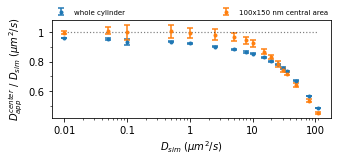

In [5]:
figsize_halfwidth = (5, 1.8)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig2c = plt.figure(figsize = figsize_halfwidth)
axs2c = fig2c.subplots(1)
axs2c.set_xscale('log')
axs2c.set_yticks([0.5, 0.7, 0.9], minor = True)
axs2c.set_yticklabels(['','',''], minor = True)
axs2c.set_yticks([0.4, 0.6, 0.8, 1])
axs2c.set_yticklabels([0.4, 0.6, 0.8, 1])
axs2c.set_ylabel(r'$D^{center}_{app}$ / $D_{sim}$ $(\mu m^2/s)$')#'D_center [um^2/s] CPD_corr')

xticks = [0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 2, 3, 4, 5, 6, 7, 8, 9, 20, 30, 40, 50, 60, 70, 80, 90, 110]
xticklabels = ['' for i in xticks]


axs2c.set_xlabel('$D_{sim}$ $(\mu m^2/s)$')
axs2c.set_xticks(xticks, minor=True)
axs2c.set_xticklabels(xticklabels, minor=True)
axs2c.set_xticks([0.01, 0.1, 1, 10, 100])
axs2c.set_xticklabels([0.01, 0.1, 1, 10, 100])
axs2c.errorbar(names, regions_avg, yerr = regions_stdev, fmt = '.', ls = 'none', capsize = 3, capthick = 1.5, elinewidth = 1.5, color = 'C0', label = 'whole cylinder')
axs2c.errorbar(names, squares_avg, yerr = squares_stdev, fmt = '.', ls = 'none', capsize = 3, capthick = 1.5, elinewidth = 1.5, color = 'C1', label = '100x150 nm central area')
axs2c.plot(np.linspace(0.01, 110, 1000), [1 for i in range(1000)], ls='dotted', markersize=0, lw=1.2, color = 'black', alpha = 0.5)

axs2c.legend(fontsize=7, bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0., frameon=False)

fig2c.savefig('fig2c.pdf', dpi = 300, format = 'pdf', bbox_inches='tight')

Data from real life cells

In [6]:
path = os.getcwd()
path += '\\files\\for_paper\\tables and figures'

diffusions = pd.read_excel(path + '\\diffusions.xlsx')
diffusions = diffusions.to_numpy().T

D_left = diffusions[::6]
points_left = diffusions[1::6]
D_center = diffusions[2::6]
points_center = diffusions[3::6]
D_right = diffusions[4::6]
points_right = diffusions[5::6]

In [7]:
# testing for normality

names = ['mEos3.2','ThrC','GrxC','IlvC','AceB','AcpP','ErpA','TrxA','LeuS','Icd',"TrxA2_hvo",'TrxA_lla']

for index, protein in enumerate(D_center):
    
    protein = protein[~np.isnan(protein)]
    
    normality = stats.kstest(protein, 'norm')
    p_value = normality[1]
    print(protein)
    print(p_value)
    
    if p_value > 0.05:
        
        print(names[index], 'is normally distributed')
        
    else:
        
        print(names[index], 'is not normally distributed')

[12.93 14.19 10.92  9.06  9.69 10.34  9.24  9.37 14.47 10.82 11.24 16.3
 11.74 11.44  9.52 10.93 11.57 11.6   9.92 11.16 10.56  8.71 10.58 10.64
 12.17 11.09 11.22 12.37 11.08 12.08 12.02 14.43 11.64 11.24 12.23]
0.0
mEos3.2 is not normally distributed
[11.18  9.56 10.17  6.28  6.16 10.51  8.22  7.09  8.08  8.83  6.18  6.79
  8.02  9.61  7.26  6.57  7.56  6.42  8.34  7.35  8.52  6.65  7.36  8.49
  7.56  8.26  6.27  8.08  6.07  6.99  6.98  6.49  6.83  6.83  8.34  8.08
  8.47  8.8   8.84  9.11  7.62  7.92  7.74  8.51  8.39  7.44  6.94  8.69
  7.45  8.66  6.96  8.22  7.9   7.57]
0.0
ThrC is not normally distributed
[10.03 11.87 10.45 12.11 11.67 10.54  9.04  9.64 10.86 10.12  8.82  9.1
 13.86 10.64 10.82  9.09  9.32 13.31 11.19  9.76 10.91  8.92 11.75  8.63
 10.17  9.88  9.41  9.02 10.    9.38  8.31]
0.0
GrxC is not normally distributed
[2.07 2.46 2.74 2.53 1.83 2.66 2.85 2.63 2.42 2.38 2.95 3.99 2.81 3.78
 3.87 3.85 2.89 3.18 3.15 3.64 3.29 3.26 2.87 3.13 2.75 2.69 3.6  2.68
 3.2  2.9  3

In [8]:
# print number of cells, mean and stdev of cell center for each protein
# calculate total number of all cells and of heterelogous ones, to get the number of mEos + native
total = 0

for protein in D_center:
    
    print(len(protein[~np.isnan(protein)]))
    print(np.nanmean(protein))
    print(np.nanstd(protein))
    
    total += len(protein[~np.isnan(protein)])
    
length_het = len(D_center[-1][~np.isnan(D_center[-1])]) + len(D_center[-2][~np.isnan(D_center[-2])])

total_no_het = total - length_het
print(total_no_het)

35
11.386
1.6071344507716656
54
7.837222222222221
1.1185596172238432
31
10.278064516129032
1.3206997640665386
37
2.9381081081081084
0.5197808157490473
31
6.924516129032258
1.075698838744069
28
9.618928571428572
1.569629936563107
26
7.779230769230769
1.0610985710643441
41
8.725609756097562
1.7788528076050392
43
4.071395348837209
0.7531162589622206
23
5.028695652173913
0.8539539970698253
19
8.083684210526318
1.2421255573721235
27
6.617777777777778
1.2555516224127186
349


In [9]:
names = ['mEos3.2','ThrC','GrxC','IlvC','AceB','AcpP','ErpA','TrxA','LeuS','Icd',"TrxA2_hvo",'TrxA_lla']

ID = ['1','3','8','9','11','12','13','15','16','19','15_hvo','15_lla']

MW = np.array([25.7,47.1,9.1,54,60.2,8.6,12.1,11.8,97.2,45.7,12.1,11.7])
MW[1:] = MW[1:] + MW[0]

complex_mass = np.array([25.7,72.8,34.8,318.9,85.9,34.3,75.5,37.5,122.9,142.8,37.8,37.4])

loneliness = np.array([0.35,89.4,36.2,10.4,0.12,0.1,0.025,0.005,1.02])

abundance = np.array([11109,6170,29065,8308,28863,3460,18242,1505,24591])

cells_count = np.array([len(protein[~np.isnan(protein)]) for protein in D_center])

D_center_mean = np.nanmean(D_center, axis = 1)
D_center_stdev = np.nanstd(D_center, axis = 1)

D_left_ratio_mean = np.nanmean(D_left/D_center, axis = 1)
D_left_ratio_stdev = np.nanstd(D_left/D_center, axis = 1)

D_right_ratio_mean = np.nanmean(D_right/D_center, axis = 1)
D_right_ratio_stdev = np.nanstd(D_right/D_center, axis = 1)

# left pole / cell center and right pole / cell center
# Will need this later

D_center_all = D_center[~np.isnan(D_center)]
D_left_all = D_left[~np.isnan(D_left)]
D_right_all = D_right[~np.isnan(D_right)]

D_left_ratio_all = D_left_all/D_center_all
D_right_ratio_all = D_right_all/D_center_all

Creating figure 4c-f

In [10]:
# correlation fig 4c
print(stats.spearmanr(D_center_mean[1:-2], abundance))

SpearmanrResult(correlation=-0.06666666666666667, pvalue=0.8646897846262037)


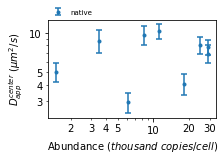

In [11]:
figsize_halfwidth = (3, 1.8)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig4c = plt.figure(figsize = figsize_halfwidth)
axs4c = fig4c.subplots(1)
axs4c.set_xscale('log')
axs4c.set_yscale('log')
axs4c.set_yticks([2,3,4,5,6,7,8,9,15], minor = True)
axs4c.set_yticklabels([2,3,4,5,'','','','',15], minor = True)
axs4c.set_yticks([10])
axs4c.set_yticklabels([10])
axs4c.set_ylabel(r'$D^{center}_{app}$ $(\mu m^2/s)$')#'D_center [um^2/s] CPD_corr')


axs4c.set_xlabel('Abundance $(thousand$ $copies/cell)$')
axs4c.set_xticks([2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 20000, 30000], minor=True)
axs4c.set_xticklabels([2, 3, 4, 5, '', '', '', '', 20, 30], minor=True)
axs4c.set_xticks([10000])
axs4c.set_xticklabels([10])
axs4c.errorbar(abundance, D_center_mean[2:-1], yerr = D_center_stdev[2:-1], fmt = '.', ls = 'none', capsize = 3, capthick = 1.5, elinewidth = 1.5, label = 'native')
axs4c.legend(fontsize=7, bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0., frameon=False)

fig4c.savefig('fig4c.pdf', dpi = 300, format = 'pdf', bbox_inches='tight')

In [12]:
# correlation fig 4d

print(stats.spearmanr(D_center_mean[1:-2], loneliness))

SpearmanrResult(correlation=0.049999999999999996, pvalue=0.8983528043506301)


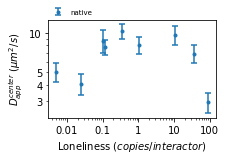

In [13]:
figsize_halfwidth = (3, 1.8)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig4d = plt.figure(figsize = figsize_halfwidth)
axs4d = fig4d.subplots(1)
axs4d.set_xscale('log')
axs4d.set_yscale('log')
axs4d.set_yticks([2,3,4,5,6,7,8,9,15], minor = True)
axs4d.set_yticklabels([2,3,4,5,'','','','',15], minor = True)
axs4d.set_yticks([10])
axs4d.set_yticklabels([10])
axs4d.set_ylabel(r'$D^{center}_{app}$ $(\mu m^2/s)$')#'D_center [um^2/s] CPD_corr')

xticks = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 2, 3, 4, 5, 6, 7, 8, 9, 20, 30, 40, 50, 60, 70, 80, 90]
xticklabels = ['' for i in xticks]

axs4d.set_xlabel('Loneliness $(copies/interactor)$')
axs4d.set_xticks(xticks, minor=True)
axs4d.set_xticklabels(xticklabels, minor=True)
axs4d.set_xticks([0.01, 0.1, 1, 10, 100])
axs4d.set_xticklabels([0.01, 0.1, 1, 10, 100])
axs4d.errorbar(loneliness, D_center_mean[2:-1], yerr = D_center_stdev[2:-1], fmt = '.', ls = 'none', capsize = 3, capthick = 1.5, elinewidth = 1.5, label = 'native')
axs4d.legend(fontsize=7, bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0., frameon=False)

fig4d.savefig('fig4d.pdf', dpi = 300, format = 'pdf', bbox_inches='tight')


In [14]:
# correlation 4e

print(stats.spearmanr(D_center_mean, MW))

SpearmanrResult(correlation=-0.7986001739057148, pvalue=0.0018404248554876482)


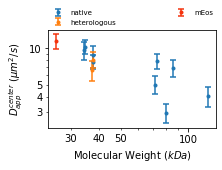

In [15]:
figsize_halfwidth = (3, 1.8)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig4e = plt.figure(figsize = figsize_halfwidth)
axs4e = fig4e.subplots(1)
axs4e.set_xscale('log')
axs4e.set_yscale('log')
axs4e.set_yticks([2,3,4,5,6,7,8,9,15], minor = True)
axs4e.set_yticklabels([2,3,4,5,'','','','',15], minor = True)
axs4e.set_yticks([10])
axs4e.set_yticklabels([10])
axs4e.set_ylabel(r'$D^{center}_{app}$ $(\mu m^2/s)$')#'D_center [um^2/s] CPD_corr')


axs4e.set_xlabel('Molecular Weight $(kDa)$')
axs4e.set_xticks([10, 20, 30, 40, 50, 60, 70, 80, 90], minor=True)
axs4e.set_xticklabels([10, 20, 30, 40, 50, '', '', '', ''], minor=True)
axs4e.set_xticks([100])
axs4e.set_xticklabels([100])
axs4e.errorbar(MW[1:-2], D_center_mean[1:-2], yerr = D_center_stdev[1:-2], fmt = '.', ls = 'none', capsize = 3, capthick = 1.5, elinewidth = 1.5, label = 'native')
axs4e.errorbar(MW[-2:], D_center_mean[-2:], yerr = D_center_stdev[-2:], fmt = '.', ls = 'none', capsize = 3, capthick = 1.5, elinewidth = 1.5, label = 'heterologous')
axs4e.errorbar(MW[0], D_center_mean[0], yerr = D_center_stdev[0], fmt = '.', ls = 'none', capsize = 3, capthick = 1.5, elinewidth = 1.5, label = 'mEos', color = 'xkcd:vermillion')

axs4e.legend(fontsize=7, bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0., frameon=False)

fig4e.savefig('fig4e.pdf', dpi = 300, format = 'pdf', bbox_inches='tight')

In [16]:
# correlation 4f

print(stats.spearmanr(D_center_mean, complex_mass))

SpearmanrResult(correlation=-0.8811188811188813, pvalue=0.00015267406467669873)


In [17]:
# correlation 4f no heterologous

print(stats.spearmanr(D_center_mean[:-2], complex_mass[:-2]))

SpearmanrResult(correlation=-0.9757575757575757, pvalue=1.4675461874042197e-06)


In [51]:
# since I have correlation, I want to fit a curve through my data, calculate the expected values and residuals

# fitting data for 4f
def exponential(mass, a, b):
    
    return a*((mass)**b)

values, cov_matrix = scipy.optimize.curve_fit(exponential, complex_mass, D_center_mean, sigma = D_center_stdev)

xdata_het = np.linspace(np.amin(complex_mass), np.amax(complex_mass),1000)
ydata_het = exponential(xdata_het, values[0], values[1])

# calculate expected values for residual plot
expected_complex_mass = exponential(complex_mass, values[0], values[1])
expected_complex_mass_stokes = exponential(complex_mass, values[0], -1/3)

print(values)
print(np.sqrt(cov_matrix[-1,-1]))

[52.60113622 -0.48770739]
0.06631266616021524


In [52]:
# since I have correlation, I want to fit a curve through my data, calculate the expected values and residuals

# fitting data for 64f no heterologous
def exponential(mass, a, b):
    
    return a*((mass)**b)

values_nohet, cov_matrix_nohet = scipy.optimize.curve_fit(exponential, complex_mass[:-2], D_center_mean[:-2], sigma = D_center_stdev[:-2])

xdata = np.linspace(np.amin(complex_mass[:-2]), np.amax(complex_mass[:-2]),1000)
ydata = exponential(xdata, values_nohet[0], values_nohet[1])

# calculate expected values for residual plot
expected_complex_mass_nohet = exponential(complex_mass[:-2], values_nohet[0], values_nohet[1])
expected_complex_mass_nohet_stokes = exponential(complex_mass[:-2], values_nohet[0], -1/3)

print(values_nohet)
print(np.sqrt(cov_matrix_nohet[-1,-1]))

[67.67134843 -0.53585967]
0.05306470887108785


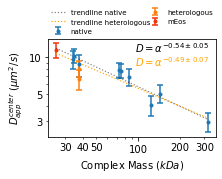

In [53]:
figsize_halfwidth = (3, 1.8)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig4f = plt.figure(figsize = figsize_halfwidth)
axs4f = fig4f.subplots(1)
axs4f.set_xscale('log')
axs4f.set_yscale('log')
axs4f.set_yticks([2,3,4,5,6,7,8,9,15], minor = True)
axs4f.set_yticklabels([2,3,'',5,'','','','',15], minor = True)
axs4f.set_yticks([10])
axs4f.set_yticklabels([10])
axs4f.set_ylabel(r'$D^{center}_{app}$ $(\mu m^2/s)$')#'D_center [um^2/s] CPD_corr')


axs4f.set_xlabel('Complex Mass $(kDa)$')
axs4f.set_xticks([30, 40, 50, 60, 70, 80, 90, 200, 300], minor=True)
axs4f.set_xticklabels([30, 40, 50, '', '', '', '', 200, 300], minor=True)
axs4f.set_xticks([100])
axs4f.set_xticklabels([100])
axs4f.errorbar(complex_mass[1:-2], D_center_mean[1:-2], yerr = D_center_stdev[1:-2], fmt = '.', ls = 'none', capsize = 3, capthick = 1.5, elinewidth = 1.5, label = 'native')
axs4f.errorbar(complex_mass[-2:], D_center_mean[-2:], yerr = D_center_stdev[-2:], fmt = '.', ls = 'none', capsize = 3, capthick = 1.5, elinewidth = 1.5, label = 'heterologous')
axs4f.errorbar(complex_mass[0], D_center_mean[0], yerr = D_center_stdev[0], fmt = '.', ls = 'none', capsize = 3, capthick = 1.5, elinewidth = 1.5, label = 'mEos', color = 'xkcd:vermillion')


axs4f.plot(xdata, ydata, ls='dotted', markersize=0, lw=1.2, label='trendline native', color = 'black', alpha = 0.5)
axs4f.plot(xdata_het, ydata_het, ls='dotted', markersize=0, lw=1.2, label='trendline heterologous', color = 'orange', alpha = 1)
axs4f.annotate( r'$D  =  \alpha^{-0.49 \pm 0.07}$' , xy=(95, 8.5), color = 'orange')
axs4f.annotate( r'$D  =  \alpha^{-0.54 \pm 0.05}$' , xy=(95, 11), color = 'black')

axs4f.legend(fontsize=7, bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0., frameon=False)

fig4f.savefig('fig4f.pdf', dpi = 300, format = 'pdf', bbox_inches='tight')

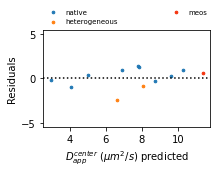

In [21]:
#analysis of residuals for complex_mass
# figure s3
figsize_halfwidth = (3, 1.8)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

figs3 = plt.figure(figsize = figsize_halfwidth)
axss3 = figs3.subplots(1)
axss3.set_xlabel(r'$D^{center}_{app}$ $(\mu m^2/s)$ predicted')#'D_center [um^2/s] CPD_corr')
axss3.set_ylabel(r'Residuals')#'D_center [um^2/s] CPD_corr')
axss3.set_ylim([-5.5,5.5])

axss3.axhline(0, color = 'black', ls = 'dotted')
axss3.scatter(D_center_mean[1:-2], -(expected_complex_mass_nohet[1:] - D_center_mean[1:-2]), s = 7, label = 'native')
axss3.scatter(D_center_mean[-2:], -(expected_complex_mass[-2:] - D_center_mean[-2:]), s = 7, label = 'heterogeneous')
axss3.scatter(D_center_mean[0], -(expected_complex_mass_nohet[0] - D_center_mean[0]), color = 'xkcd:vermillion', s = 7, label = 'meos')

axss3.legend(fontsize=7, bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0., frameon=False)

figs3.savefig('figs3.pdf', dpi = 300, format = 'pdf', bbox_inches='tight')

F-Test

In [22]:
# get values of D_center for every cell in every set

D_center_sets = []

for index, protein in enumerate(D_center):

    protein = protein[~np.isnan(protein)]

    D_center_sets.append(protein)

# get complex mass for all cells, to correlate every single D with complex mass
complex_mass_sets = [np.repeat(complex_mass[i], len(D_center_sets[i])) for i in range(len(complex_mass))]

# flatten the lists
D_center_ravelled = []
complex_mass_ravelled = []

for i in range(len(D_center_sets)):
    
    for j in range(len(D_center_sets[i])):
        
        D_center_ravelled.append(D_center_sets[i][j])
        complex_mass_ravelled.append(complex_mass_sets[i][j])
        
D_center_ravelled = np.array(D_center_ravelled)
complex_mass_ravelled = np.array(complex_mass_ravelled)

def exponential_unconstrained(mass, a, b):

    return a*((mass)**b)

def exponential_constrained(mass, a):
    
    return a*(mass**(-0.33))

values_unconstraied, cov_matrix_unconstrained = scipy.optimize.curve_fit(exponential_unconstrained, complex_mass[:-2], D_center_mean[:-2], sigma = D_center_stdev[:-2])
values_constraied, cov_matrix_constrained = scipy.optimize.curve_fit(exponential_constrained, complex_mass[:-2], D_center_mean[:-2], sigma = D_center_stdev[:-2])

expected_complex_mass_nohet = exponential(complex_mass_ravelled[:-length_het], values_unconstraied[0], values_unconstraied[1])
expected_complex_mass_nohet_stokes = exponential(complex_mass_ravelled[:-length_het], values_constraied[0], -0.33)


residuals_sum = np.sum((D_center_ravelled[:-length_het] - expected_complex_mass_nohet)**2)
residuals_sum_theory = np.sum((D_center_ravelled[:-length_het] - expected_complex_mass_nohet_stokes)**2)

# residual_sum --> unrestricted --> parameters = 2
# residual_sum_theory --> restricted --> parameters = 1

f = (residuals_sum_theory - residuals_sum)/(residuals_sum/(total_no_het - 2))

print(f)
print()
print(residuals_sum)
print(residuals_sum_theory)

148.7108129570286

741.396718331506
1059.1307491866974


figure 5b, diffusion center for trxa

In [23]:
trxa = D_center[7]
trxa = trxa[~np.isnan(trxa)]

trxa_lla = D_center[-1]
trxa_lla = trxa_lla[~np.isnan(trxa_lla)]

trxa_hvo = D_center[-2]
trxa_hvo = trxa_hvo[~np.isnan(trxa_hvo)]

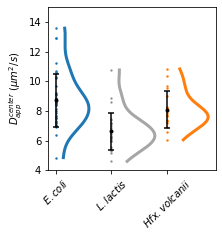

In [24]:
trxa_mean = np.mean(trxa)
trxa_stdev = np.std(trxa)

trxa_lla_mean = np.mean(trxa_lla)
trxa_lla_stdev = np.std(trxa_lla)

trxa_hvo_mean = np.mean(trxa_hvo)
trxa_hvo_stdev = np.std(trxa_hvo)

def gaussian_kde(data_for_kernel, data_to_plot):

    kernel = stats.gaussian_kde(data_for_kernel)
    x = kernel(data_to_plot) 
    
    return x

y_trxa = np.linspace(np.amin(trxa), np.amax(trxa), 1000)
x_trxa = 1.1 + 2*gaussian_kde(trxa, y_trxa)

y_trxa_lla = np.linspace(np.amin(trxa_lla), np.amax(trxa_lla), 1000)
x_trxa_lla = 2.1 + 2*gaussian_kde(trxa_lla, y_trxa_lla)

y_trxa_hvo = np.linspace(np.amin(trxa_hvo), np.amax(trxa_hvo), 1000)
x_trxa_hvo = 3.1 + 2*gaussian_kde(trxa_hvo, y_trxa_hvo)

figsize_halfwidth = (3, 3)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig5b = plt.figure(figsize = figsize_halfwidth)
axs5b = fig5b.subplots(1)
axs5b.set_ylabel(r'$D^{center}_{app}$ $(\mu m^2/s)$')#'D_center [um^2/s] CPD_corr')
axs5b.set_ylim([4, 15])

axs5b.set_xticks([1,2,3])
axs5b.set_xticklabels(['$E. coli$', '$L. lactis$', '$Hfx. volcanii$'], rotation = 45)
axs5b.errorbar(1, np.mean(trxa), yerr = np.std(trxa), fmt = '.', ls = 'none', capsize = 3, capthick = 1.5, elinewidth = 1.5, color = 'black', alpha = 1)
axs5b.scatter([1 for i in range(len(trxa))], trxa, s = 2, alpha = 1)
axs5b.plot(x_trxa, y_trxa, linewidth = 3)
axs5b.errorbar(2, np.mean(trxa_lla), yerr = np.std(trxa_lla), fmt = '.', ls = 'none', capsize = 3, capthick = 1.5, elinewidth = 1.5, color = 'black', alpha = 1)
axs5b.scatter([2 for i in range(len(trxa_lla))], trxa_lla, s = 2, alpha = 0.7, c = 'grey')
axs5b.plot(x_trxa_lla, y_trxa_lla, c = 'grey', alpha = 0.7, linewidth = 3)
axs5b.errorbar(3, np.mean(trxa_hvo), yerr = np.std(trxa_hvo), fmt = '.', ls = 'none', capsize = 3, capthick = 1.5, elinewidth = 1.5, color = 'black', alpha = 1)
axs5b.scatter([3 for i in range(len(trxa_hvo))], trxa_hvo, s = 2, alpha = 1)
axs5b.plot(x_trxa_hvo, y_trxa_hvo, linewidth = 3)

fig5b.savefig('fig5b.pdf', dpi = 300, format = 'pdf', bbox_inches='tight')

In [25]:
stats.mannwhitneyu(trxa, trxa_lla)

MannwhitneyuResult(statistic=958.5, pvalue=3.972412537832612e-07)

In [26]:
stats.mannwhitneyu(trxa, trxa_hvo)

MannwhitneyuResult(statistic=476.5, pvalue=0.16923498880291044)

Creating figure 5C and 5D for simulation with D ranging from 1 to 15, radius from 0.4 to 1.2, length from 2 to 3.6

In [27]:
# get simulated cells and analyze

path = os.getcwd()
path += '\\files\\for_paper\\maps poles vs center new'

left_pole_all = []
center_all = []
right_pole_all = []

for file in os.listdir(path):
    
    if file.endswith("diff_first_fit.csv.zip"):
        name = path + '\\' + file
        df = pd.read_csv(name, index_col = 0)
        
        left_pole_all.append(df.iloc[0,0])
        center_all.append(df.iloc[0,1])
        right_pole_all.append(df.iloc[0,2])
        
left_pole_all = np.array(left_pole_all)
center_all = np.array(center_all)
right_pole_all = np.array(right_pole_all)


In [28]:
path = os.getcwd()
path += '\\files\\for_paper\\maps poles vs center new'

D_1 = []
D_2_5 = []
D_3 = []
D_5 = []
D_8 = []
D_10 = []
D_12_5 = []
D_15 = []
D_17_5 = []
D_20 = []

left_ratio_sim = []
right_ratio_sim = []


names = [1.0, 2.5, 3.0, 5.0, 8.0, 10.0, 12.5, 15.0, 17.5, 20.0]
names = np.array(names)

for file in os.listdir(path):
    
    if file.endswith("diff_first_fit.csv.zip"):
        name = path + '\\' + file
        
        df = pd.read_csv(name, index_col = 0)
        left_pole = df.iloc[0,0]
        center = df.iloc[0,1]
        right_pole = df.iloc[0,2]
        
        left_ratio = left_pole/center
        right_ratio = right_pole/center
        
        left_ratio_sim.append(left_ratio)
        right_ratio_sim.append(right_ratio)
        
        poles_ratio = (left_ratio + right_ratio)/2
            
        # if file[-36:-32] == '_0.5':
        #     D_0_5.append([poles_ratio, center])
            
        if file[-36:-32] == '_1.0':
            D_1.append([poles_ratio, center])
            
        elif file[-36:-32] == '_2.5':
            D_2_5.append([poles_ratio, center])
            
        elif file[-36:-32] == '_3.0':
            D_3.append([poles_ratio, center])
            
        elif file[-36:-32] == '_5.0':
            D_5.append([poles_ratio, center])
            
        elif file[-36:-32] == '_8.0':
            D_8.append([poles_ratio, center])
            
        elif file[-36:-32] == '10.0':
            D_10.append([poles_ratio, center])
            
        elif file[-36:-32] == '12.5':
            D_12_5.append([poles_ratio, center])
            
        elif file[-36:-32] == '15.0':
            D_15.append([poles_ratio, center])
            
        elif file[-36:-32] == '17.5':
            D_17_5.append([poles_ratio, center])
            
        elif file[-36:-32] == '20.0':
            D_20.append([poles_ratio, center])
            
        else:
            print('wrong')

left_ratio_sim = np.array(left_ratio_sim)
right_ratio_sim = np.array(right_ratio_sim)
            
# D_0_5_mean = np.mean(D_0_5, axis = 0)
# D_0_5_stdev = np.std(D_0_5, axis = 0)

D_1_mean = np.mean(D_1, axis = 0)
D_1_stdev = np.std(D_1, axis = 0)

D_2_5_mean = np.mean(D_2_5, axis = 0)
D_2_5_stdev = np.std(D_2_5, axis = 0)

D_3_mean = np.mean(D_3, axis = 0)
D_3_stdev = np.std(D_3, axis = 0)

D_5_mean = np.mean(D_5, axis = 0)
D_5_stdev = np.std(D_5, axis = 0)

D_8_mean = np.mean(D_8, axis = 0)
D_8_stdev = np.std(D_8, axis = 0)

D_10_mean = np.mean(D_10, axis = 0)
D_10_stdev = np.std(D_10, axis = 0)

D_12_5_mean = np.mean(D_12_5, axis = 0)
D_12_5_stdev = np.std(D_12_5, axis = 0)

D_15_mean = np.mean(D_15, axis = 0)
D_15_stdev = np.std(D_15, axis = 0)

D_17_5_mean = np.mean(D_17_5, axis = 0)
D_17_5_stdev = np.std(D_17_5, axis = 0)

D_20_mean = np.mean(D_20, axis = 0)
D_20_stdev = np.std(D_20, axis = 0)



maps_means = [D_1_mean, D_2_5_mean, D_3_mean, D_5_mean, D_8_mean, D_10_mean, D_12_5_mean, D_15_mean, D_17_5_mean, D_20_mean]
maps_stdevs = [D_1_stdev, D_2_5_stdev, D_3_stdev, D_5_stdev, D_8_stdev, D_10_stdev, D_12_5_stdev, D_15_stdev, D_17_5_stdev, D_20_stdev]
maps_means = np.array(maps_means)
maps_stdevs = np.array(maps_stdevs)

In [29]:
# compare poles sim avg vs real poles avg
poles_avg_real = np.mean([D_left_ratio_all, D_right_ratio_all], axis = 0)
poles_avg_sim = np.mean([left_pole_all/center_all, right_pole_all/center_all], axis = 0)

poles_avg_real_mean = (D_left_ratio_mean + D_right_ratio_mean)/2
poles_avg_real_mean_stdev = (D_left_ratio_stdev + D_right_ratio_stdev)/2

In [30]:
# testing data for normality
normality_poles_avg_real = stats.shapiro(poles_avg_real)
normality_poles_avg_sim = stats.shapiro(poles_avg_sim)

print(normality_poles_avg_real)
print(normality_poles_avg_sim)

ShapiroResult(statistic=0.9978506565093994, pvalue=0.8987882137298584)
ShapiroResult(statistic=0.8448610305786133, pvalue=6.957778797556102e-10)


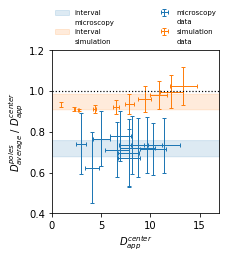

In [31]:
figsize_halfwidth = (3, 3)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig5c = plt.figure(figsize = figsize_halfwidth)
axs5c = fig5c.subplots(1)
axs5c.set_yticks([0.4,0.6,0.8,1.0,1.2])
axs5c.set_yticklabels([0.4,0.6,0.8,1.0,1.2])
axs5c.set_ylabel(r'$D^{poles}_{average}$ $/$ $D^{center}_{app}$')#'D_center [um^2/s] CPD_corr')
axs5c.set_ylim([0.4, 1.2])

axs5c.set_xlabel(r'$D^{center}_{app}$')
axs5c.set_xlim([0, 17])
axs5c.errorbar(D_center_mean, poles_avg_real_mean, xerr = D_center_stdev, yerr = poles_avg_real_mean_stdev, fmt = '', ls = 'none', capsize = 2, capthick = 1, elinewidth = 1, color = 'C0', alpha = 1, label = 'microscopy')
axs5c.errorbar(D_center_mean, poles_avg_real_mean, xerr = D_center_stdev, yerr = poles_avg_real_mean_stdev, fmt = '', ls = 'none', capsize = 2, capthick = 1, elinewidth = 1, color = 'C0', alpha = 0, label = 'data')
axs5c.errorbar(maps_means[:,1], maps_means[:,0], xerr = maps_stdevs[:,1], yerr = maps_stdevs[:,0], fmt = '', ls = 'none', capsize = 2, capthick = 1, elinewidth = 1, color = 'C1', alpha = 1, label = 'simulation')
axs5c.errorbar(maps_means[:,1], maps_means[:,0], xerr = maps_stdevs[:,1], yerr = maps_stdevs[:,0], fmt = '', ls = 'none', capsize = 2, capthick = 1, elinewidth = 1, color = 'C1', alpha = 0, label = 'data')

axs5c.plot(np.linspace(0, 17, 1000), [1 for i in range(1000)], ls='dotted', markersize=0, lw=1.2, color = 'black', alpha = 1)

axs5c.fill_between(np.linspace(0, 17, 1000), [np.mean(poles_avg_real_mean) - np.std(poles_avg_real_mean) for i in range(1000)], [np.mean(poles_avg_real_mean) + np.std(poles_avg_real_mean) for i in range(1000)], color = 'C0', alpha = 0.15, label = 'interval')
axs5c.fill_between(np.linspace(0, 17, 1000), [np.mean(poles_avg_real_mean) - np.std(poles_avg_real_mean) for i in range(1000)], [np.mean(poles_avg_real_mean) + np.std(poles_avg_real_mean) for i in range(1000)], color = 'C0', alpha = 0, label = 'microscopy')
axs5c.fill_between(np.linspace(0, 17, 1000), [np.mean(maps_means[:,0]) - np.std(maps_means[:,0]) for i in range(1000)], [np.mean(maps_means[:,0]) + np.std(maps_means[:,0]) for i in range(1000)], color = 'C1', alpha = 0.15, label = 'interval')
axs5c.fill_between(np.linspace(0, 17, 1000), [np.mean(maps_means[:,0]) - np.std(maps_means[:,0]) for i in range(1000)], [np.mean(maps_means[:,0]) + np.std(maps_means[:,0]) for i in range(1000)], color = 'C1', alpha = 0, label = 'simulation')

axs5c.legend(fontsize=7, bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0., frameon=False)

fig5c.savefig('fig5c.pdf', dpi = 300, format = 'pdf', bbox_inches='tight')





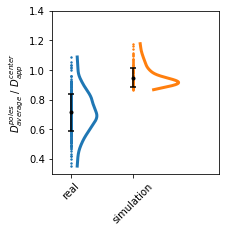

In [32]:
#creting figure 5d

poles_avg_real_avg = np.mean(poles_avg_real)
poles_avg_real_stdev = np.std(poles_avg_real)
poles_avg_sim_avg = np.mean(poles_avg_sim)
poles_avg_sim_stdev = np.std(poles_avg_sim)


def gaussian_kde(data_for_kernel, data_to_plot):

    kernel = stats.gaussian_kde(data_for_kernel)
    x = kernel(data_to_plot) 
    
    return x

y_poles_avg_real = np.linspace(np.amin(poles_avg_real), np.amax(poles_avg_real), 1000)
x_poles_avg_real = 1.1 + 0.1*gaussian_kde(poles_avg_real, y_poles_avg_real)

y_poles_avg_sim = np.linspace(np.amin(poles_avg_sim), np.amax(poles_avg_sim), 1000)
x_poles_avg_sim = 2.1 + 0.075*gaussian_kde(poles_avg_sim, y_poles_avg_sim)

figsize_halfwidth = (3, 3)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig5d = plt.figure(figsize = figsize_halfwidth)
axs5d = fig5d.subplots(1)
axs5d.set_ylabel(r'$D^{poles}_{average}$ $/$ $D^{center}_{app}$')
axs5d.set_ylim([0.3, 1.4])

axs5d.set_xlim([0.7, 3.4])
axs5d.set_xticks([1,2])
axs5d.set_xticklabels(['real', 'simulation'], rotation = 45)
axs5d.errorbar(1, poles_avg_real_avg, yerr = poles_avg_real_stdev, fmt = '.', ls = 'none', capsize = 3, capthick = 1.5, elinewidth = 1.5, color = 'black', alpha = 1)
axs5d.scatter([1 for i in range(len(poles_avg_real))], poles_avg_real, s = 2, alpha = 1)
axs5d.plot(x_poles_avg_real, y_poles_avg_real, linewidth = 3)
axs5d.errorbar(2, poles_avg_sim_avg, yerr = poles_avg_sim_stdev, fmt = '.', ls = 'none', capsize = 3, capthick = 1.5, elinewidth = 1.5, color = 'black', alpha = 1)
axs5d.scatter([2 for i in range(len(poles_avg_sim))], poles_avg_sim, s = 2, alpha = 1)
axs5d.plot(x_poles_avg_sim, y_poles_avg_sim, linewidth = 3)

fig5d.savefig('fig5d.pdf', dpi = 300, format = 'pdf', bbox_inches='tight')

In [33]:
print(poles_avg_real_avg)
print(poles_avg_sim_avg)

0.7135809163113989
0.9488430875627726


In [34]:
print(np.mean(poles_avg_real), np.std(poles_avg_real))
print(np.mean(poles_avg_sim), np.std(poles_avg_sim))

0.7135809163113989 0.12205449044045356
0.9488430875627726 0.0654548232450038


In [35]:
# test to compare data regardless of their normality
stats.mannwhitneyu(poles_avg_real, poles_avg_sim)

MannwhitneyuResult(statistic=1817.0, pvalue=5.002946825332524e-53)

Creating figure 5e

In [49]:
T = 293.15  # temperature in kelvin
kB_corr = 1.38E-6  # boltzmann constant corrected simplified in the formula
NA = 6.022E23  # avogadro number
rho = 1.41  # protein density

# calculate viscosity
def calc_eta(MW, D, T, kB_corr, NA, rho):
    
    return (kB_corr*T)/(6*np.pi*D*(((3*MW)/(4*np.pi*rho*NA))**(1/3)))

# propagate error
def err_eta(MW, D, err_D, T, kB_corr, NA, rho):
    
    alpha = (kB_corr*T)/(6*np.pi*(((3*MW)/(4*np.pi*rho*NA))**(1/3)))
    
    return alpha*(err_D/(D**2))
    

def fit_viscosity(MW, a):
    
    return a*(MW**(-1/3 - values_nohet[1]))


visco_x = (complex_mass[:-2])*1000
visco_y = calc_eta(visco_x, D_center_mean[:-2], T, kB_corr, NA, rho)
err_visco_y = err_eta(visco_x, D_center_mean[:-2], D_center_stdev[:-2], T, kB_corr, NA, rho)

values_visc, cov_matrix_visc = scipy.optimize.curve_fit(fit_viscosity, visco_x, visco_y, sigma = err_visco_y)

print(-1/3 - values_nohet[1])
print(values_visc)
print(np.sqrt(cov_matrix_visc[-1,-1]))

x_visc = np.linspace(np.amin(visco_x), np.amax(visco_x), 1000)
y_visc = fit_viscosity(x_visc, values_visc[0])
print(np.amin(y_visc), np.amax(y_visc))

0.20252633209828746
[1.15349891]
0.04058508643470597
9.018717161268931 15.01938499340583


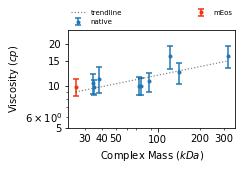

In [37]:
figsize_halfwidth = (3, 1.8)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig5e = plt.figure(figsize = figsize_halfwidth)
axs5e = fig5e.subplots(1)
axs5e.set_xscale('log')
axs5e.set_yscale('log')
axs5e.set_yticks([5,10,15,20])
axs5e.set_yticklabels([5,10,15,20])
axs5e.set_ylim([5,25])
axs5e.set_ylabel(r'Viscosity $(cp)$')#'D_center [um^2/s] CPD_corr')


axs5e.set_xlabel('Complex Mass $(kDa)$')
axs5e.set_xticks([30000, 40000, 50000, 60000, 70000, 80, 90000, 200000, 300000], minor=True)
axs5e.set_xticklabels([30, 40, 50, '', '', '', '', 200, 300], minor=True)
axs5e.set_xticks([100000])
axs5e.set_xticklabels([100])
axs5e.errorbar(visco_x[1:], visco_y[1:], yerr = err_visco_y[1:], fmt = '.', ls = 'none', capsize = 3, capthick = 1.5, elinewidth = 1.5, label = 'native')
axs5e.errorbar(visco_x[0], visco_y[0], yerr = err_visco_y[0], fmt = '.', ls = 'none', capsize = 3, capthick = 1.5, elinewidth = 1.5, label = 'mEos', color = 'xkcd:vermillion')


axs5e.plot(x_visc, y_visc, ls='dotted', markersize=0, lw=1.2, label='trendline', color = 'black', alpha = 0.5)

axs5e.legend(fontsize=7, bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0., frameon=False)

fig5e.savefig('fig5e.pdf', dpi = 300, format = 'pdf', bbox_inches='tight')

Figure s2 - cell dimensions

In [38]:
path = os.getcwd()
path += '\\files\\for_paper\\tables and figures'

sizes = pd.read_excel(path + '\\sizes.xlsx')
sizes = sizes.to_numpy().T

lengths = sizes[::2]
widths = sizes[1::2]

lengths_mean = np.nanmean(lengths, axis = 1)
lengths_stdev = np.nanstd(lengths, axis = 1)

widths_mean = np.nanmean(widths, axis = 1)
widths_stdev = np.nanstd(widths, axis = 1)

In [39]:
print(lengths_mean)
print(widths_mean)

[2.33407712 2.01744332 2.04377758 2.1748608  2.31556714 2.12992656
 2.28217351 2.2418297  2.29579455 2.2477628  1.93727965 2.23678532]
[0.95697915 0.87411131 0.91742335 0.98422037 1.14760533 0.88403271
 1.03423151 0.89095643 0.96178841 0.9845992  0.80577257 0.88538052]


In [40]:
lengths_all = lengths[~np.isnan(lengths)]
widths_all = widths[~np.isnan(widths)]

print(np.amin(lengths_all), np.amax(lengths_all))
print(np.amin(widths_all), np.amax(widths_all))
print(np.median(lengths_all), np.median(widths_all))

1.13932386266452 3.57338201545728
0.406147135430228 2.33642086355257
2.19678608661795 0.869121279555783


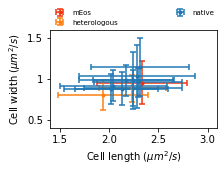

In [41]:
figsize_halfwidth = (3, 1.8)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
figs2 = plt.figure(figsize = figsize_halfwidth)
axss2 = figs2.subplots(1)
axss2.set_yticks([0.5, 1, 1.5])
axss2.set_yticklabels([0.5, 1, 1.5])
axss2.set_ylabel(r'Cell width $(\mu m^2/s)$')#'D_center [um^2/s] CPD_corr')
axss2.set_xlabel(r'Cell length $(\mu m^2/s)$')
axss2.set_xticks([1.5, 2.0, 2.5, 3.0])
axss2.set_xticklabels([1.5, 2.0, 2.5, 3.0])
axss2.set_xlim([1.4,3.1])
axss2.set_ylim([0.4, 1.6])

axss2.errorbar(lengths_mean[0], widths_mean[0], xerr = lengths_stdev[0], yerr = widths_stdev[0], fmt = '.', ls = 'none', capsize = 3, capthick = 1.5, elinewidth = 1.5, label = 'mEos', color = 'xkcd:vermillion')
axss2.errorbar(lengths_mean[-2:], widths_mean[-2:], xerr = lengths_stdev[-2:], yerr = widths_stdev[-2:], fmt = '.', ls = 'none', capsize = 3, capthick = 1.5, elinewidth = 1.5, label = 'heterologous', color = 'C1')
axss2.errorbar(lengths_mean[1:-2], widths_mean[1:-2], xerr = lengths_stdev[1:-2], yerr = widths_stdev[1:-2], fmt = '.', ls = 'none', capsize = 3, capthick = 1.5, elinewidth = 1.5, label = 'native', color = 'C0')
    
axss2.legend(fontsize=7, bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0., frameon=False)
figs2.savefig('figs2.pdf', dpi = 300, format = 'pdf', bbox_inches='tight')
    
    

Fast pole vs slow pole

In [42]:
real_faster = np.where(D_left_ratio_all > D_right_ratio_all, D_left_ratio_all, D_right_ratio_all)
real_slower = np.where(D_left_ratio_all <= D_right_ratio_all, D_left_ratio_all, D_right_ratio_all)

sim_faster = np.where(left_ratio_sim > right_ratio_sim, left_ratio_sim, right_ratio_sim)
sim_slower = np.where(left_ratio_sim <= right_ratio_sim, left_ratio_sim, right_ratio_sim)

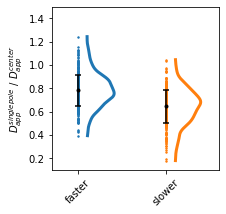

In [43]:
#real fast vs slow

poles_faster_real_avg = np.mean(real_faster)
poles_faster_real_stdev = np.std(real_faster)
poles_slower_real_avg = np.mean(real_slower)
poles_slower_real_stdev = np.std(real_slower)


def gaussian_kde(data_for_kernel, data_to_plot):

    kernel = stats.gaussian_kde(data_for_kernel)
    x = kernel(data_to_plot) 
    
    return x

y_poles_faster_real = np.linspace(np.amin(real_faster), np.amax(real_faster), 1000)
x_poles_faster_real = 1.1 + 0.1*gaussian_kde(real_faster, y_poles_faster_real)

y_poles_slower_real = np.linspace(np.amin(real_slower), np.amax(real_slower), 1000)
x_poles_slower_real = 2.1 + 0.1*gaussian_kde(real_slower, y_poles_slower_real)

figsize_halfwidth = (3, 3)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig11a = plt.figure(figsize = figsize_halfwidth)
axs11a = fig11a.subplots(1)
axs11a.set_ylabel(r'$D^{single pole}_{app}$ $/$ $D^{center}_{app}$')
axs11a.set_ylim([0.1, 1.5])

axs11a.set_xlim([0.7, 2.6])
axs11a.set_xticks([1,2])
axs11a.set_xticklabels(['faster', 'slower'], rotation = 45)
axs11a.errorbar(1, poles_faster_real_avg, yerr = poles_faster_real_stdev, fmt = '.', ls = 'none', capsize = 3, capthick = 1.5, elinewidth = 1.5, color = 'black', alpha = 1)
axs11a.scatter([1 for i in range(len(real_faster))], real_faster, s = 2, alpha = 1)
axs11a.plot(x_poles_faster_real, y_poles_faster_real, linewidth = 3)
axs11a.errorbar(2, poles_slower_real_avg, yerr = poles_slower_real_stdev, fmt = '.', ls = 'none', capsize = 3, capthick = 1.5, elinewidth = 1.5, color = 'black', alpha = 1)
axs11a.scatter([2 for i in range(len(real_slower))], real_slower, s = 2, alpha = 1)
axs11a.plot(x_poles_slower_real, y_poles_slower_real, linewidth = 3)

fig11a.savefig('fig11a.pdf', dpi = 300, format = 'pdf', bbox_inches='tight')

In [44]:
stats.mannwhitneyu(real_faster, real_slower)

MannwhitneyuResult(statistic=118952.0, pvalue=2.55051602796676e-37)

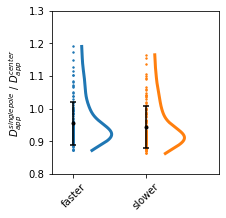

In [45]:
#sim fast vs slow

poles_faster_sim_avg = np.mean(sim_faster)
poles_faster_sim_stdev = np.std(sim_faster)
poles_slower_sim_avg = np.mean(sim_slower)
poles_slower_sim_stdev = np.std(sim_slower)


def gaussian_kde(data_for_kernel, data_to_plot):

    kernel = stats.gaussian_kde(data_for_kernel)
    x = kernel(data_to_plot) 
    
    return x

y_poles_faster_sim = np.linspace(np.amin(sim_faster), np.amax(sim_faster), 1000)
x_poles_faster_sim = 1.1 + 0.05*gaussian_kde(sim_faster, y_poles_faster_sim)

y_poles_slower_sim = np.linspace(np.amin(sim_slower), np.amax(sim_slower), 1000)
x_poles_slower_sim = 2.1 + 0.05*gaussian_kde(sim_slower, y_poles_slower_sim)

figsize_halfwidth = (3, 3)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig11b = plt.figure(figsize = figsize_halfwidth)
axs11b = fig11b.subplots(1)
axs11b.set_ylabel(r'$D^{single pole}_{app}$ $/$ $D^{center}_{app}$')
axs11b.set_ylim([0.8, 1.3])

axs11b.set_xlim([0.7, 3])
axs11b.set_xticks([1,2])
axs11b.set_xticklabels(['faster', 'slower'], rotation = 45)
axs11b.errorbar(1, poles_faster_sim_avg, yerr = poles_faster_sim_stdev, fmt = '.', ls = 'none', capsize = 3, capthick = 1.5, elinewidth = 1.5, color = 'black', alpha = 1)
axs11b.scatter([1 for i in range(len(sim_faster))], sim_faster, s = 2, alpha = 1)
axs11b.plot(x_poles_faster_sim, y_poles_faster_sim, linewidth = 3)
axs11b.errorbar(2, poles_slower_sim_avg, yerr = poles_slower_sim_stdev, fmt = '.', ls = 'none', capsize = 3, capthick = 1.5, elinewidth = 1.5, color = 'black', alpha = 1)
axs11b.scatter([2 for i in range(len(sim_slower))], sim_slower, s = 2, alpha = 1)
axs11b.plot(x_poles_slower_sim, y_poles_slower_sim, linewidth = 3)

fig11b.savefig('fig11b.pdf', dpi = 300, format = 'pdf', bbox_inches='tight')

In [46]:
stats.mannwhitneyu(sim_faster, sim_slower)

MannwhitneyuResult(statistic=8228.0, pvalue=0.05604869875548652)

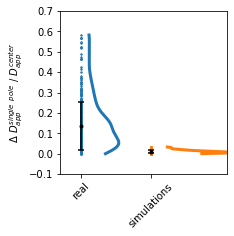

In [47]:
#sim fast vs slow

faster_vs_slower_real = (real_faster - real_slower)
faster_vs_slower_sim = (sim_faster - sim_slower) 

faster_vs_slower_real_avg = np.mean(faster_vs_slower_real)
faster_vs_slower_real_stdev = np.std(faster_vs_slower_real)
faster_vs_slower_sim_avg = np.mean(faster_vs_slower_sim)
faster_vs_slower_sim_stdev = np.std(faster_vs_slower_sim)


def gaussian_kde(data_for_kernel, data_to_plot):

    kernel = stats.gaussian_kde(data_for_kernel)
    x = kernel(data_to_plot) 
    
    return x

y_poles_real = np.linspace(np.amin(faster_vs_slower_real), np.amax(faster_vs_slower_real), 1000)
x_poles_real = 1.1 + 0.1*gaussian_kde(faster_vs_slower_real, y_poles_real)

y_poles_sim = np.linspace(np.amin(faster_vs_slower_sim), np.amax(faster_vs_slower_sim), 1000)
x_poles_sim = 2.1 + 0.02*gaussian_kde(faster_vs_slower_sim, y_poles_sim)

figsize_halfwidth = (3, 3)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig11c = plt.figure(figsize = figsize_halfwidth)
axs11c = fig11c.subplots(1)
axs11c.set_ylabel(r'$\Delta$ $D^{single}_{app}$ $^{pole}$ $/$ $D^{center}_{app}$')
axs11c.set_ylim([-0.1, 0.7])

axs11c.set_xlim([0.7, 3.1])
axs11c.set_xticks([1,2])
axs11c.set_xticklabels(['real', 'simulations'], rotation = 45)
axs11c.errorbar(1, faster_vs_slower_real_avg, yerr = faster_vs_slower_real_stdev, fmt = '.', ls = 'none', capsize = 3, capthick = 1.5, elinewidth = 1.5, color = 'black', alpha = 1)
axs11c.scatter([1 for i in range(len(faster_vs_slower_real))], faster_vs_slower_real, s = 2, alpha = 1)
axs11c.plot(x_poles_real, y_poles_real, linewidth = 3)
axs11c.errorbar(2, faster_vs_slower_sim_avg, yerr = faster_vs_slower_sim_stdev, fmt = '.', ls = 'none', capsize = 3, capthick = 1.5, elinewidth = 1.5, color = 'black', alpha = 1)
axs11c.scatter([2 for i in range(len(faster_vs_slower_sim))], faster_vs_slower_sim, s = 2, alpha = 1)
axs11c.plot(x_poles_sim, y_poles_sim, linewidth = 3)

fig11c.savefig('fig11c.pdf', dpi = 300, format = 'pdf', bbox_inches='tight')

In [48]:
stats.mannwhitneyu(faster_vs_slower_real, faster_vs_slower_sim)

MannwhitneyuResult(statistic=45150.0, pvalue=5.0907438607421757e-51)